In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
color = ['#E64980', '#FFA94D', '#74B816', '#748FFC']

In [2]:
df = pd.read_csv('cdata.csv')
df

,x,y,cluster
0,2.1364,0.8369,1
1,7.4096,-1.4137,3
2,5.0996,1.1552,0
3,7.8149,-1.0186,3
4,1.8925,1.2714,1
...,...,...,...
295,1.5798,1.9737,1
296,1.3918,2.5183,1
297,4.5359,0.4390,0
298,7.7911,0.3695,3


###  The reality of data clustering 

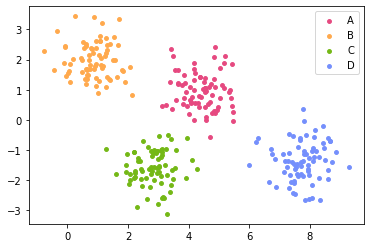

In [3]:
x0 = df['x'][df['cluster'] == 0]
y0 = df['y'][df['cluster'] == 0]

x1 = df['x'][df['cluster'] == 1]
y1 = df['y'][df['cluster'] == 1]

x2 = df['x'][df['cluster'] == 2]
y2 = df['y'][df['cluster'] == 2]

x3 = df['x'][df['cluster'] == 3]
y3 = df['y'][df['cluster'] == 3]

color = ['#E64980', '#FFA94D', '#74B816', '#748FFC']
plt.scatter(x0, y0, color=color[0], s=15, label='A')      #red
plt.scatter(x1, y1, color=color[1], s=15, label='B')    #yellow
plt.scatter(x2, y2, color=color[2], s=15, label='C')      #green
plt.scatter(x3, y3, color=color[3], s=15, label='D')     #blue
plt.legend(loc='upper right')


## (1)

had run once!
had run once!
had run once!
done


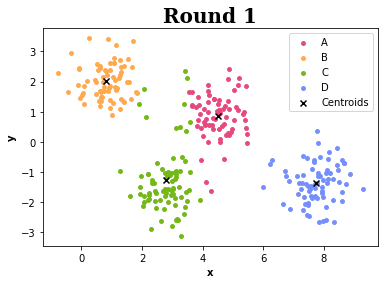

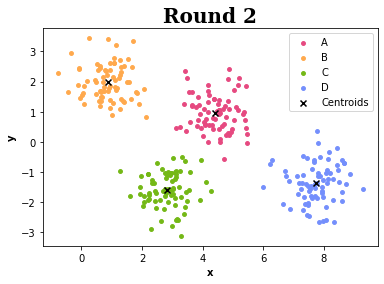

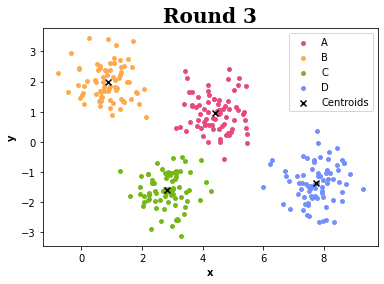

In [4]:
###  initialize centroids by randomly selecting data points  ###
k = 4
c = np.random.choice(range(len(df)), k, False)

c_x = []
c_y = []
for i in range(k) :
    c_x.append(df.loc[c[i]]['x'])
    c_y.append(df.loc[c[i]]['y'])
    
centroid = pd.DataFrame({'x' : c_x, 'y' : c_y})

r = 1  #  round number
while True :
    ###  assign points to the centroid  ###
    dist_list = []
    cluster_list = []
    for i in range(len(df)) : 
        point = np.array((df.loc[i]['x'], df.loc[i]['y']))
        
        ###  calculate the distances between data points and each centroid  ###
        dists = []
        for j in range(len(centroid)) : 
            center = np.array((centroid['x'][j], centroid['y'][j]))
            dist = np.linalg.norm(point - center)
            dists.append(dist)
    
        min_d = min(dists)   #  the distance of the point from the nearest centroid
        cluster = dists.index(min(dists))   # the nearset centroid of a point = the cluster of the point    
        dist_list.append(min_d)
        cluster_list.append(cluster)

    df['distance'] = dist_list
    df['cluster_by_kmeans'] = cluster_list

    
    ###  readjust centroids  ###
    c_x = []
    c_y = []
    for i in range(k) :
        x = df['x'][df['cluster_by_kmeans'] == i]
        y = df['y'][df['cluster_by_kmeans'] == i]
        c_x.append(x.mean())
        c_y.append(y.mean())
    
    recentroid = pd.DataFrame({'x' : c_x, 'y' : c_y})


    ### plot  ###
    plt.figure() 
    for i in range(k) :
        x = df['x'][df['cluster_by_kmeans'] == i]
        y = df['y'][df['cluster_by_kmeans'] == i]
        plt.scatter(x, y, color=color[i], s=15) 

    plt.scatter(recentroid['x'], recentroid['y'], color='black', marker='x')
    label = ['A', 'B', 'C', 'D', 'Centroids']
    plt.xlabel('x', fontweight='bold')
    plt.ylabel('y', fontweight='bold')
    plt.legend(label, loc='upper right')
    plt.title(f'Round {r}', fontdict={'family': 'serif', 'weight': 'bold', 'size': 20})
    
    print('had run once!')

    if centroid.equals(recentroid) :  #  end the algorithm
        print('done')
        break
    
    centroid = recentroid
    r = r+1


## (2)

k = 2 done. Total round: 10
k = 3 done. Total round: 12
k = 4 done. Total round: 15
k = 5 done. Total round: 3
k = 6 done. Total round: 16
k = 7 done. Total round: 5
k = 8 done. Total round: 12
k = 9 done. Total round: 13
k = 10 done. Total round: 8
k = 11 done. Total round: 9
k = 12 done. Total round: 8
k = 13 done. Total round: 10
k = 14 done. Total round: 9


Text(0, 0.5, 'Sum of square error')

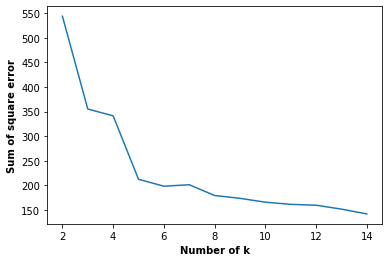

In [5]:
SSE_list = []
K = range(2, 15)
for k in K :

    ###  initialize centroids by randomly selecting data points  ###
    c = np.random.choice(range(len(df)), k, False)

    c_x = []
    c_y = []
    for i in range(k) :
        c_x.append(df.loc[c[i]]['x'])
        c_y.append(df.loc[c[i]]['y'])

    centroid = pd.DataFrame({'x' : c_x, 'y' : c_y})

    r = 1  #  round number
    while True :
        ###  assign points to the centroid  ###
        dist_list = []
        cluster_list = []
        for i in range(len(df)) : 
            point = np.array((df.loc[i]['x'], df.loc[i]['y']))

            ###  calculate the distances between data points and each centroid  ###
            dists = []
            for j in range(len(centroid)) : 
                center = np.array((centroid['x'][j], centroid['y'][j]))
                dist = np.linalg.norm(point - center)
                dists.append(dist)

            min_d = min(dists)   #  the distance of the point from the nearest centroid
            cluster = dists.index(min(dists))   # the nearset centroid of a point = the cluster of the point    
            dist_list.append(min_d)
            cluster_list.append(cluster)

        df['distance'] = dist_list
        df['cluster_by_kmeans'] = cluster_list


        ###  readjust centroids  ###
        c_x = []
        c_y = []
        for i in range(k) :
            x = df['x'][df['cluster_by_kmeans'] == i]
            y = df['y'][df['cluster_by_kmeans'] == i]
            c_x.append(x.mean())
            c_y.append(y.mean())

        recentroid = pd.DataFrame({'x' : c_x, 'y' : c_y})

        if centroid.equals(recentroid) :  #  end the algorithm
            print(f'k = {k} done. Total round: {r}')
            SSE = sum(dist_list)
            break

        centroid = recentroid
        r = r+1
    
    SSE_list.append(SSE)


plt.figure()
plt.plot(list(K), SSE_list)
plt.xlabel('Number of k', fontweight='bold')
plt.ylabel('Sum of square error', fontweight='bold')

## (3)

[ 38  95 273 167 160  46 274 190]
k = 8 done. Total round: 11
repetation : 1
[ 74  75 184 174  88  48  36 177]
k = 8 done. Total round: 6
repetation : 2
[108 155   7 250  71   1 243 265]
k = 8 done. Total round: 13
repetation : 3
[244 161 273 165 190 143 159 246]
k = 8 done. Total round: 14
repetation : 4
[ 52  58 294 143  36 255  48 270]
k = 8 done. Total round: 11
repetation : 5
[248 230  42 268 293 227   4  97]
k = 8 done. Total round: 15
repetation : 6
[267 229 119 200   1 239  24 295]
k = 8 done. Total round: 10
repetation : 7
[201 147 196 213  69   0 214  16]
k = 8 done. Total round: 10
repetation : 8
[195 219  24 286 187  51  90 218]
k = 8 done. Total round: 6
repetation : 9
[202  78  11  73 233  95 240 282]
k = 8 done. Total round: 12
repetation : 10


[186.13206115974901,
 189.24047660151106,
 181.2725978766681,
 181.9431305285393,
 195.879608498159,
 179.8299665000864,
 180.89757065842042,
 185.20315812515224,
 186.84869930094857,
 187.78399719152975]

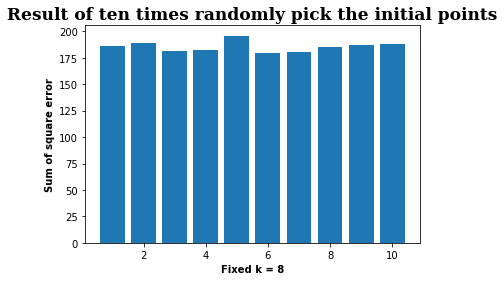

In [6]:
SSE_list = []
rep = 0
while rep < 10 :

    k = 8
    ###  initialize centroids by randomly selecting data points  ###
    c = np.random.choice(range(len(df)), k, False)
    print(c)
    c_x = []
    c_y = []
    for i in range(k) :
        c_x.append(df.loc[c[i]]['x'])
        c_y.append(df.loc[c[i]]['y'])

    centroid = pd.DataFrame({'x' : c_x, 'y' : c_y})

    r = 1  #  round number
    while True :
        ###  assign points to the centroid  ###
        dist_list = []
        cluster_list = []
        for i in range(len(df)) : 
            point = np.array((df.loc[i]['x'], df.loc[i]['y']))

            ###  calculate the distances between data points and each centroid  ###
            dists = []
            for j in range(len(centroid)) : 
                center = np.array((centroid['x'][j], centroid['y'][j]))
                dist = np.linalg.norm(point - center)
                dists.append(dist)

            min_d = min(dists)   #  the distance of the point from the nearest centroid
            cluster = dists.index(min(dists))   # the nearset centroid of a point = the cluster of the point    
            dist_list.append(min_d)
            cluster_list.append(cluster)

        df['distance'] = dist_list
        df['cluster_by_kmeans'] = cluster_list


        ###  readjust centroids  ###
        c_x = []
        c_y = []
        for i in range(k) :
            x = df['x'][df['cluster_by_kmeans'] == i]
            y = df['y'][df['cluster_by_kmeans'] == i]
            c_x.append(x.mean())
            c_y.append(y.mean())

        recentroid = pd.DataFrame({'x' : c_x, 'y' : c_y})

        if centroid.equals(recentroid) :  #  end the algorithm
            print(f'k = {k} done. Total round: {r}')
            SSE = sum(dist_list)
            break

        centroid = recentroid
        r = r+1
    
    SSE_list.append(SSE)
    rep += 1
    print(f'repetation : {rep}')

plt.figure()
plt.bar(list(range(1, 11)), SSE_list)
plt.xlabel(f'Fixed k = {k}', fontweight='bold')
plt.ylabel('Sum of square error', fontweight='bold')
plt.title('Result of ten times randomly pick the initial points', fontdict={'family': 'serif', 'weight': 'bold', 'size': 17})

SSE_list